## Data Analysis Interview Challenge

In [1]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/Users/oluwafemibabatunde'

In [3]:
path = '/Users/oluwafemibabatunde/Desktop/Springboard/ultimate_challenge'

In [4]:
os.chdir(path)

In [5]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
df = df.sort_values(by='login_time', ascending=True)

In [7]:
df.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [8]:
#df['Dates'] = pd.to_datetime(df['login_time'], format='%Y:%M:%D').dt.date
#df['Hours'] = pd.to_datetime(df['login_time'], format='%Y:%M:%D').dt.time

In [9]:
df = df.set_index('login_time')
df['Count'] = 1


In [10]:
df = df.resample('15T', how='sum')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [11]:
df.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [12]:
df = df.reset_index()

In [13]:
df['Dates'] = pd.to_datetime(df['login_time'], format='%Y:%M:%D').dt.date
df['Hours'] = pd.to_datetime(df['login_time'], format='%Y:%M:%D').dt.time

<Figure size 57600x1440 with 0 Axes>

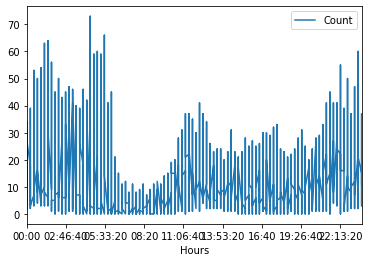

In [14]:
plt.figure(figsize=(800,20))
df.plot(x='Hours', y='Count')


In [15]:
df.head()

,login_time,Count,Dates,Hours
0,1970-01-01 20:00:00,2,1970-01-01,20:00:00
1,1970-01-01 20:15:00,6,1970-01-01,20:15:00
2,1970-01-01 20:30:00,9,1970-01-01,20:30:00
3,1970-01-01 20:45:00,7,1970-01-01,20:45:00
4,1970-01-01 21:00:00,1,1970-01-01,21:00:00


In [16]:
df.to_csv(r'/Users/oluwafemibabatunde/Desktop/Springboard/ultimate_challenge/agg_logins.csv')

In [17]:
df = df.set_index('login_time')
df['DayCount'] = 1

In [18]:
df = df.resample('24H', how='sum')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


In [19]:
df.head()

,Count,DayCount
login_time,,
1970-01-01,112,16
1970-01-02,681,96
1970-01-03,793,96
1970-01-04,788,96
1970-01-05,459,96


Analyzing the data on 15 minutes intervals, most logins on the application peaked between 2am and 4:45am. There after, there was a dip in the number of login on the platform. This dip continued till about 10am, when the number of logins started rising again. There was another peak between 11:30am and 11:45am. After this, the number of logins went down to 20s for the afternoon periods till 9:45pm. Another rise was seen around 10pm of the day and this dropped down 29 total logins for 12am period of the day.

Daily count of logins shows that the least login was recorded on the first day the data was collected. There was a peak login for any given day on April 4, 1970. 

For the 4 months span of data collected, March had the most login of 33,723. A steady rise was seen from January to March. From March to April, there was a dip in the number of login. 13,507 logins were recorded in April. This was roughly 60% drop in the number of logins from March to April.

For Tableau visualization, kindly use the link below.

https://public.tableau.com/views/loginrecord1/15minutesInterval?:language=en&:display_count=y&:origin=viz_share_link

# Part 2 ‑ Experiment and metrics design

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

A key measure of success will be for Ultimate to identify number of riders available to cross the toll bridge per day. With this in mind, drivers know they have potential increase in revenue as they are not restricted to Ultimate Gotham and Ultimate Metropolis. Also, on the business side, knowing the number of riders available to cross both cities per day, Ultimate managers can fix the price in such a way that toll cost is transfered over to the customers and profit is equally increased.

2. Describe a practical experiment you would design to compare the effectiveness of the 
proposed change in relation to the key measure of success. Please provide details on:
     * how you will implement the experiment
     * what statistical test(s) you will conduct to verify the significance of the observation
     * how you would interpret the results and provide recommendations to the city operations team along with any caveats.

I would approach this experiment in two ways as data availability will determine prediction success. The first approach will be for me to get the data of riders accross the toll birdge for an extended period of time. This data will span 4 months (to match the lenght of data of logins from Ultimate). The other method to get data if it will be difficult to get raw data from the toll bridge is to simulate the data. 

After getting the number of riders, and identifying cost implication to and fro each city per driver, ride prices can be simulated in ways that potential average income of a driver can be determined per day and the profit of Ultimate can likewise be projected.

The question that comes afterwards is that even with increased revenue and ultimate management being ready to take up the toll cost, will drivers want to cross the toll bridge?

A statistical test to confirm this will be through the poisson distribution where a probability of event that can haapen between a space and time can be determined. Hypothesis testing of this will equally be done to verify if at 0.05, the probability estimated will be significant.

Another statistical approach that can be taken will be to use normal distribution to estimate the probability of sales that will be generated if this route is opened up for drivers. The Z-test can be done to confirm if the results generated are significant.

Confidence intervals will likewise be estimated for each result gotten.

Recommendations will be given based on the probailities estimated with respect to data collected. If the probility is high that drivers will be willing to cross the toll bridge, given that there are customers, then the organization will be able to capture the untapped market across the toll bridge. The lower the probabilit of both the driver crossing the bridge and the organization generating sales, the higher the tendency that the tendency that the experiment will fail.

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later;
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [20]:
import json
with open('ultimate_data_challenge.json', 'r') as datafile:
        data = json.load(datafile)
        df = pd.DataFrame(data)


In [21]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [23]:
df.shape

(50000, 12)

In [24]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [25]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [26]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [27]:
meanDriver = df['avg_rating_of_driver'].mean()
meanDriver2 = df['avg_rating_by_driver'].mean()


df = df.fillna(value = {'avg_rating_of_driver':meanDriver
                           ,'avg_rating_by_driver':meanDriver2
                           })



#f['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean())

In [28]:
df['phone'] = df['phone'].ffill() 

In [29]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [30]:
df['phone'].value_counts()

iPhone     34849
Android    15151
Name: phone, dtype: int64

In [31]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [32]:
df['6 Months'] = (df['last_trip_date'] - df['signup_date'])


In [33]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,6 Months
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days


In [34]:
df.dtypes

city                               object
trips_in_first_30_days              int64
signup_date                datetime64[ns]
avg_rating_of_driver              float64
avg_surge                         float64
last_trip_date             datetime64[ns]
phone                              object
surge_pct                         float64
ultimate_black_user                  bool
weekday_pct                       float64
avg_dist                          float64
avg_rating_by_driver              float64
6 Months                  timedelta64[ns]
dtype: object

In [35]:
df['6 Months'] = df['6 Months'].astype('timedelta64[D]').astype(int)


In [36]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,6 Months
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47


This line of code will enable new feature be developed to identify users that used the platform 6 months after signing up on the platform. 180 days is assumed as the number of days in 6 months. 

In [37]:
df['retained6Monts'] = df['6 Months']/180
def f(row):
    if row>=1:
        row =1
    else:
        row=0
    return row

df['retained6Monts'] = df['retained6Monts'].apply(f)

In [38]:
df['6 Months'].describe()

count    50000.000000
mean        92.790100
std         62.129822
min          0.000000
25%         27.000000
50%        110.000000
75%        150.000000
max        181.000000
Name: 6 Months, dtype: float64

In [39]:
df['retained6Monts'].value_counts()

0    49915
1       85
Name: retained6Monts, dtype: int64

Assumption here is that a user is retained if they took a trip in the preceeding 30 days.
To capture the percentage of users that took trip in the first 30 days, we have:

In [40]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,6 Months,retained6Monts
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,0


In [41]:
dfRetained = df[df['trips_in_first_30_days']>0] 

In [42]:
dfRetained.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,6 Months,retained6Monts
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,0
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,148,0


In [43]:
dfRetained.shape

(34610, 14)

In [44]:
totalObservedUsers = 50000
totalRetainedUsers = 34610
perRetained = (totalRetainedUsers/totalObservedUsers)*100
perRetained

69.22

Within the first 30 days of signing up on the platform for different users, 69.22% of the users were retained.

In [45]:
df['WeekdaySignUp'] = df['signup_date'].dt.weekday_name.head()

In [46]:
df['WeekdayLastTrip'] = df['last_trip_date'].dt.weekday_name.head()

In [47]:
df = df.drop(['signup_date','last_trip_date'], axis=1)

In [48]:
df.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,6 Months,retained6Monts
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,0.164784,0.016430
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,-0.015183,0.000664
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,-0.016809,0.000885
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,0.004068,0.003490
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,0.165035,0.004957
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,0.020408,0.002816
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,-0.109431,-0.009696
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,-0.032651,-0.001028
6 Months,0.164784,-0.015183,-0.016809,0.004068,0.165035,0.020408,-0.109431,-0.032651,1.000000,0.058026
retained6Monts,0.016430,0.000664,0.000885,0.003490,0.004957,0.002816,-0.009696,-0.001028,0.058026,1.000000


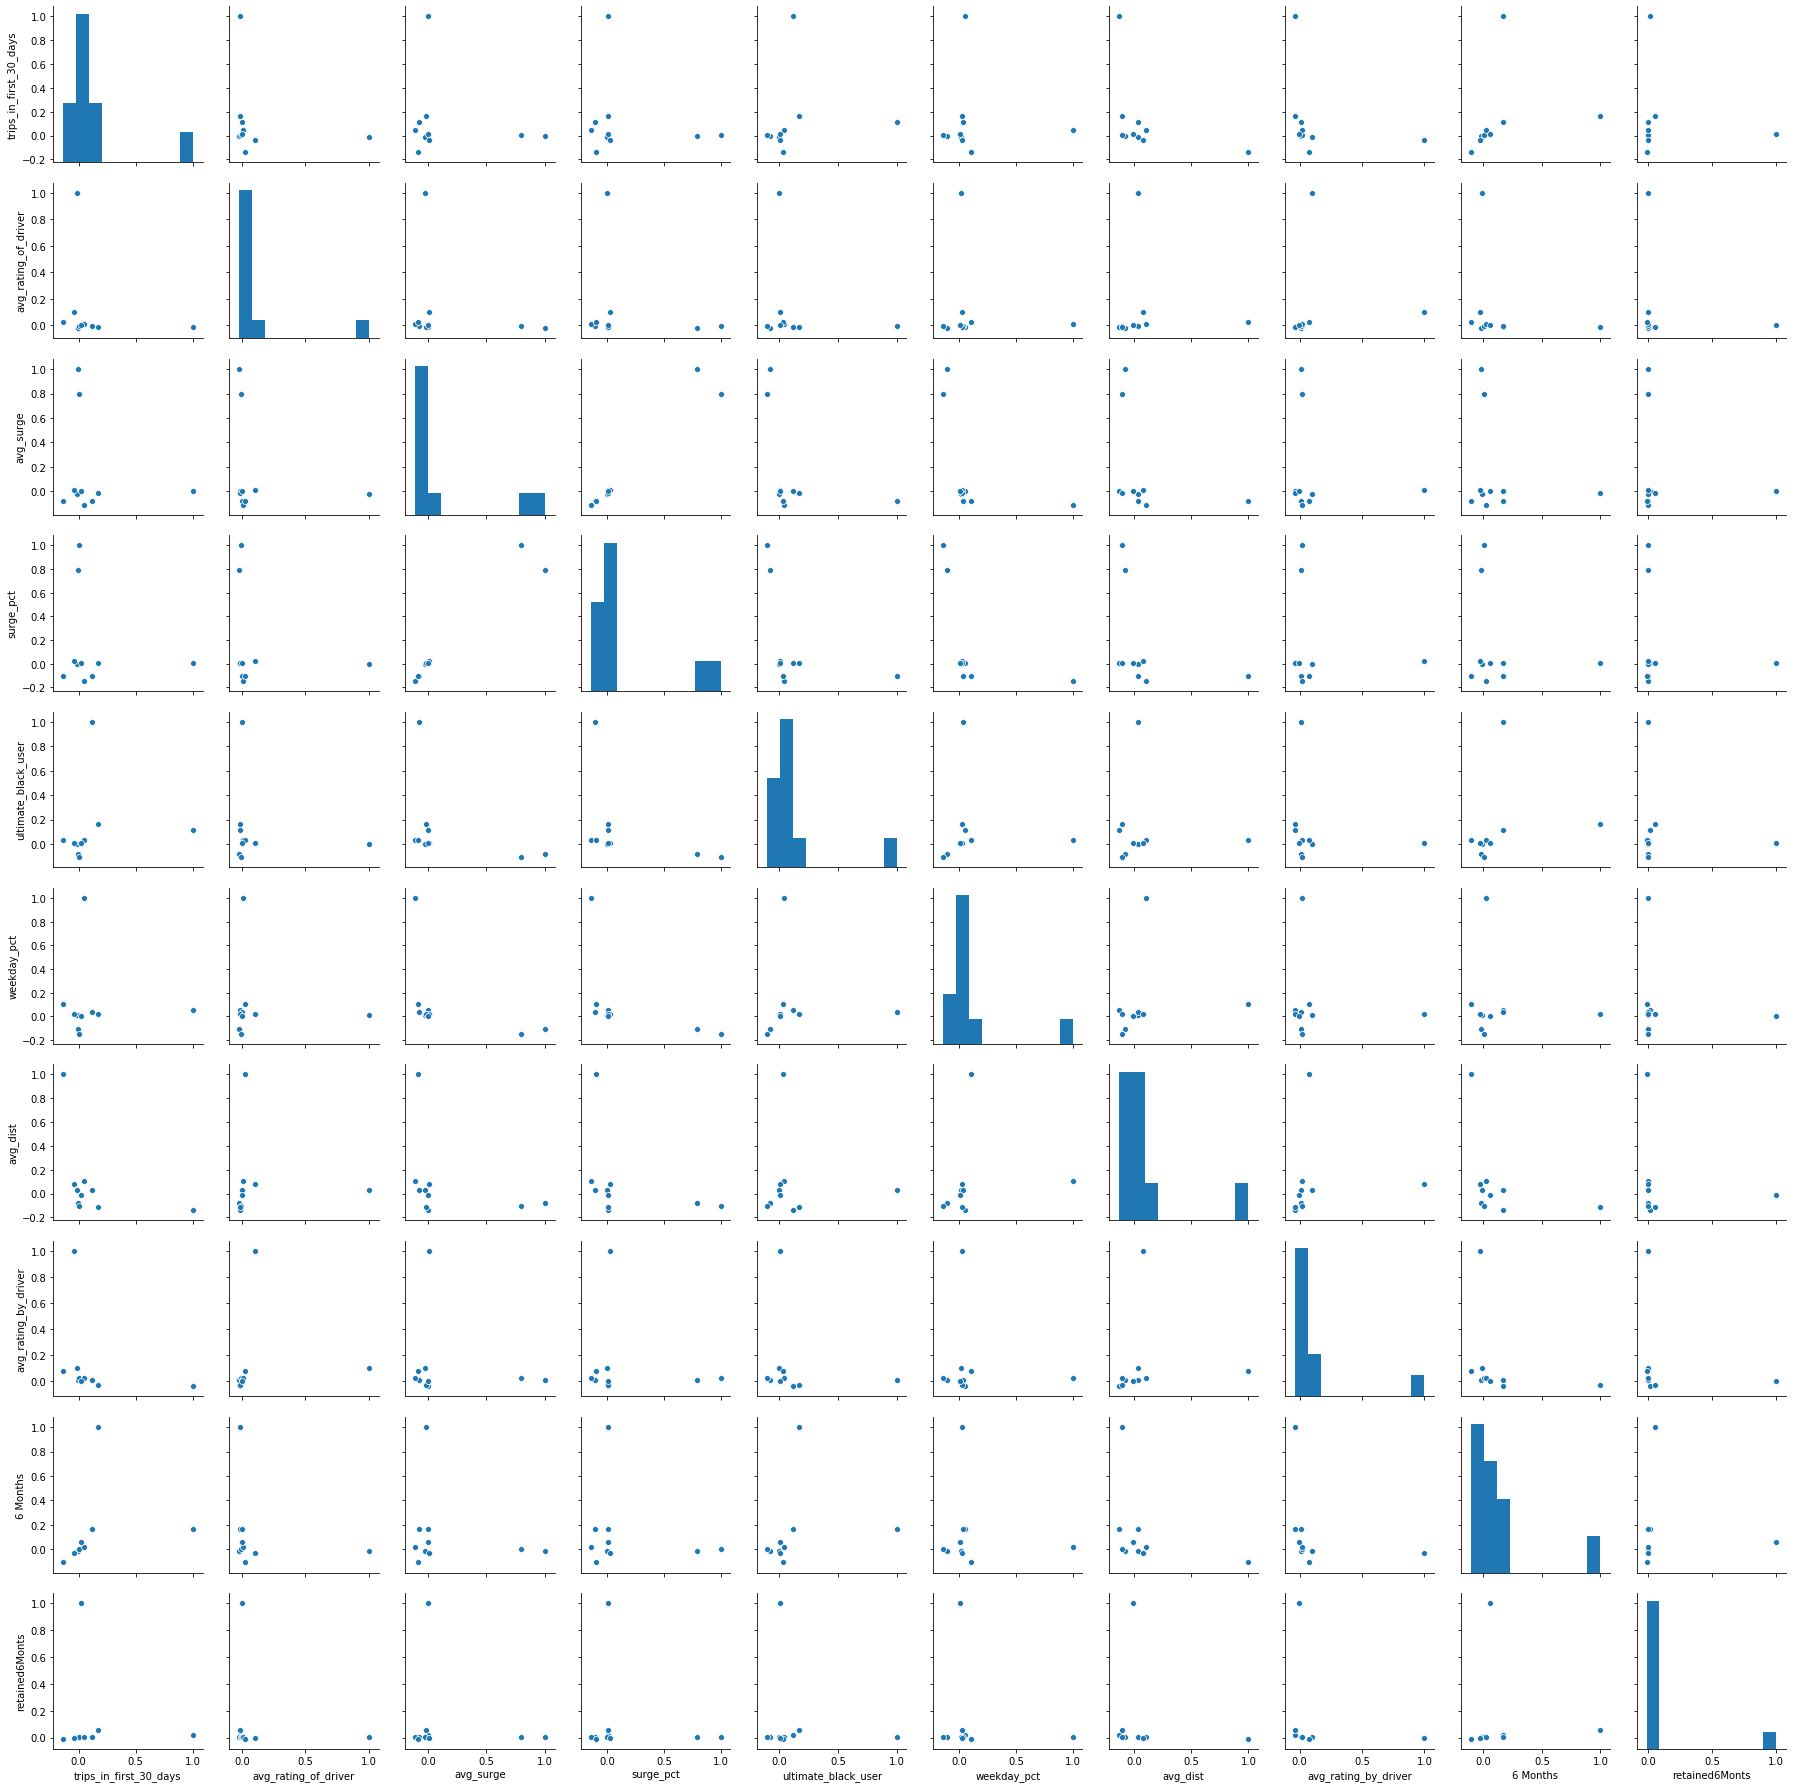

In [49]:
sns.pairplot(df.corr())

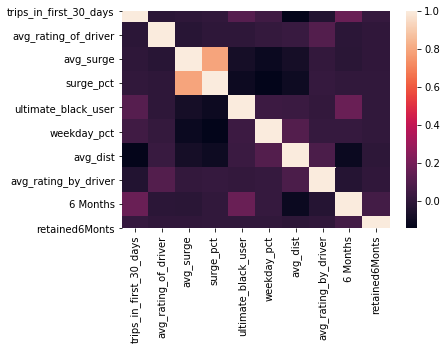

In [50]:
sns.heatmap(df.corr())

In [51]:
df.columns

Index(['city', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', '6 Months', 'retained6Monts', 'WeekdaySignUp',
       'WeekdayLastTrip'],
      dtype='object')

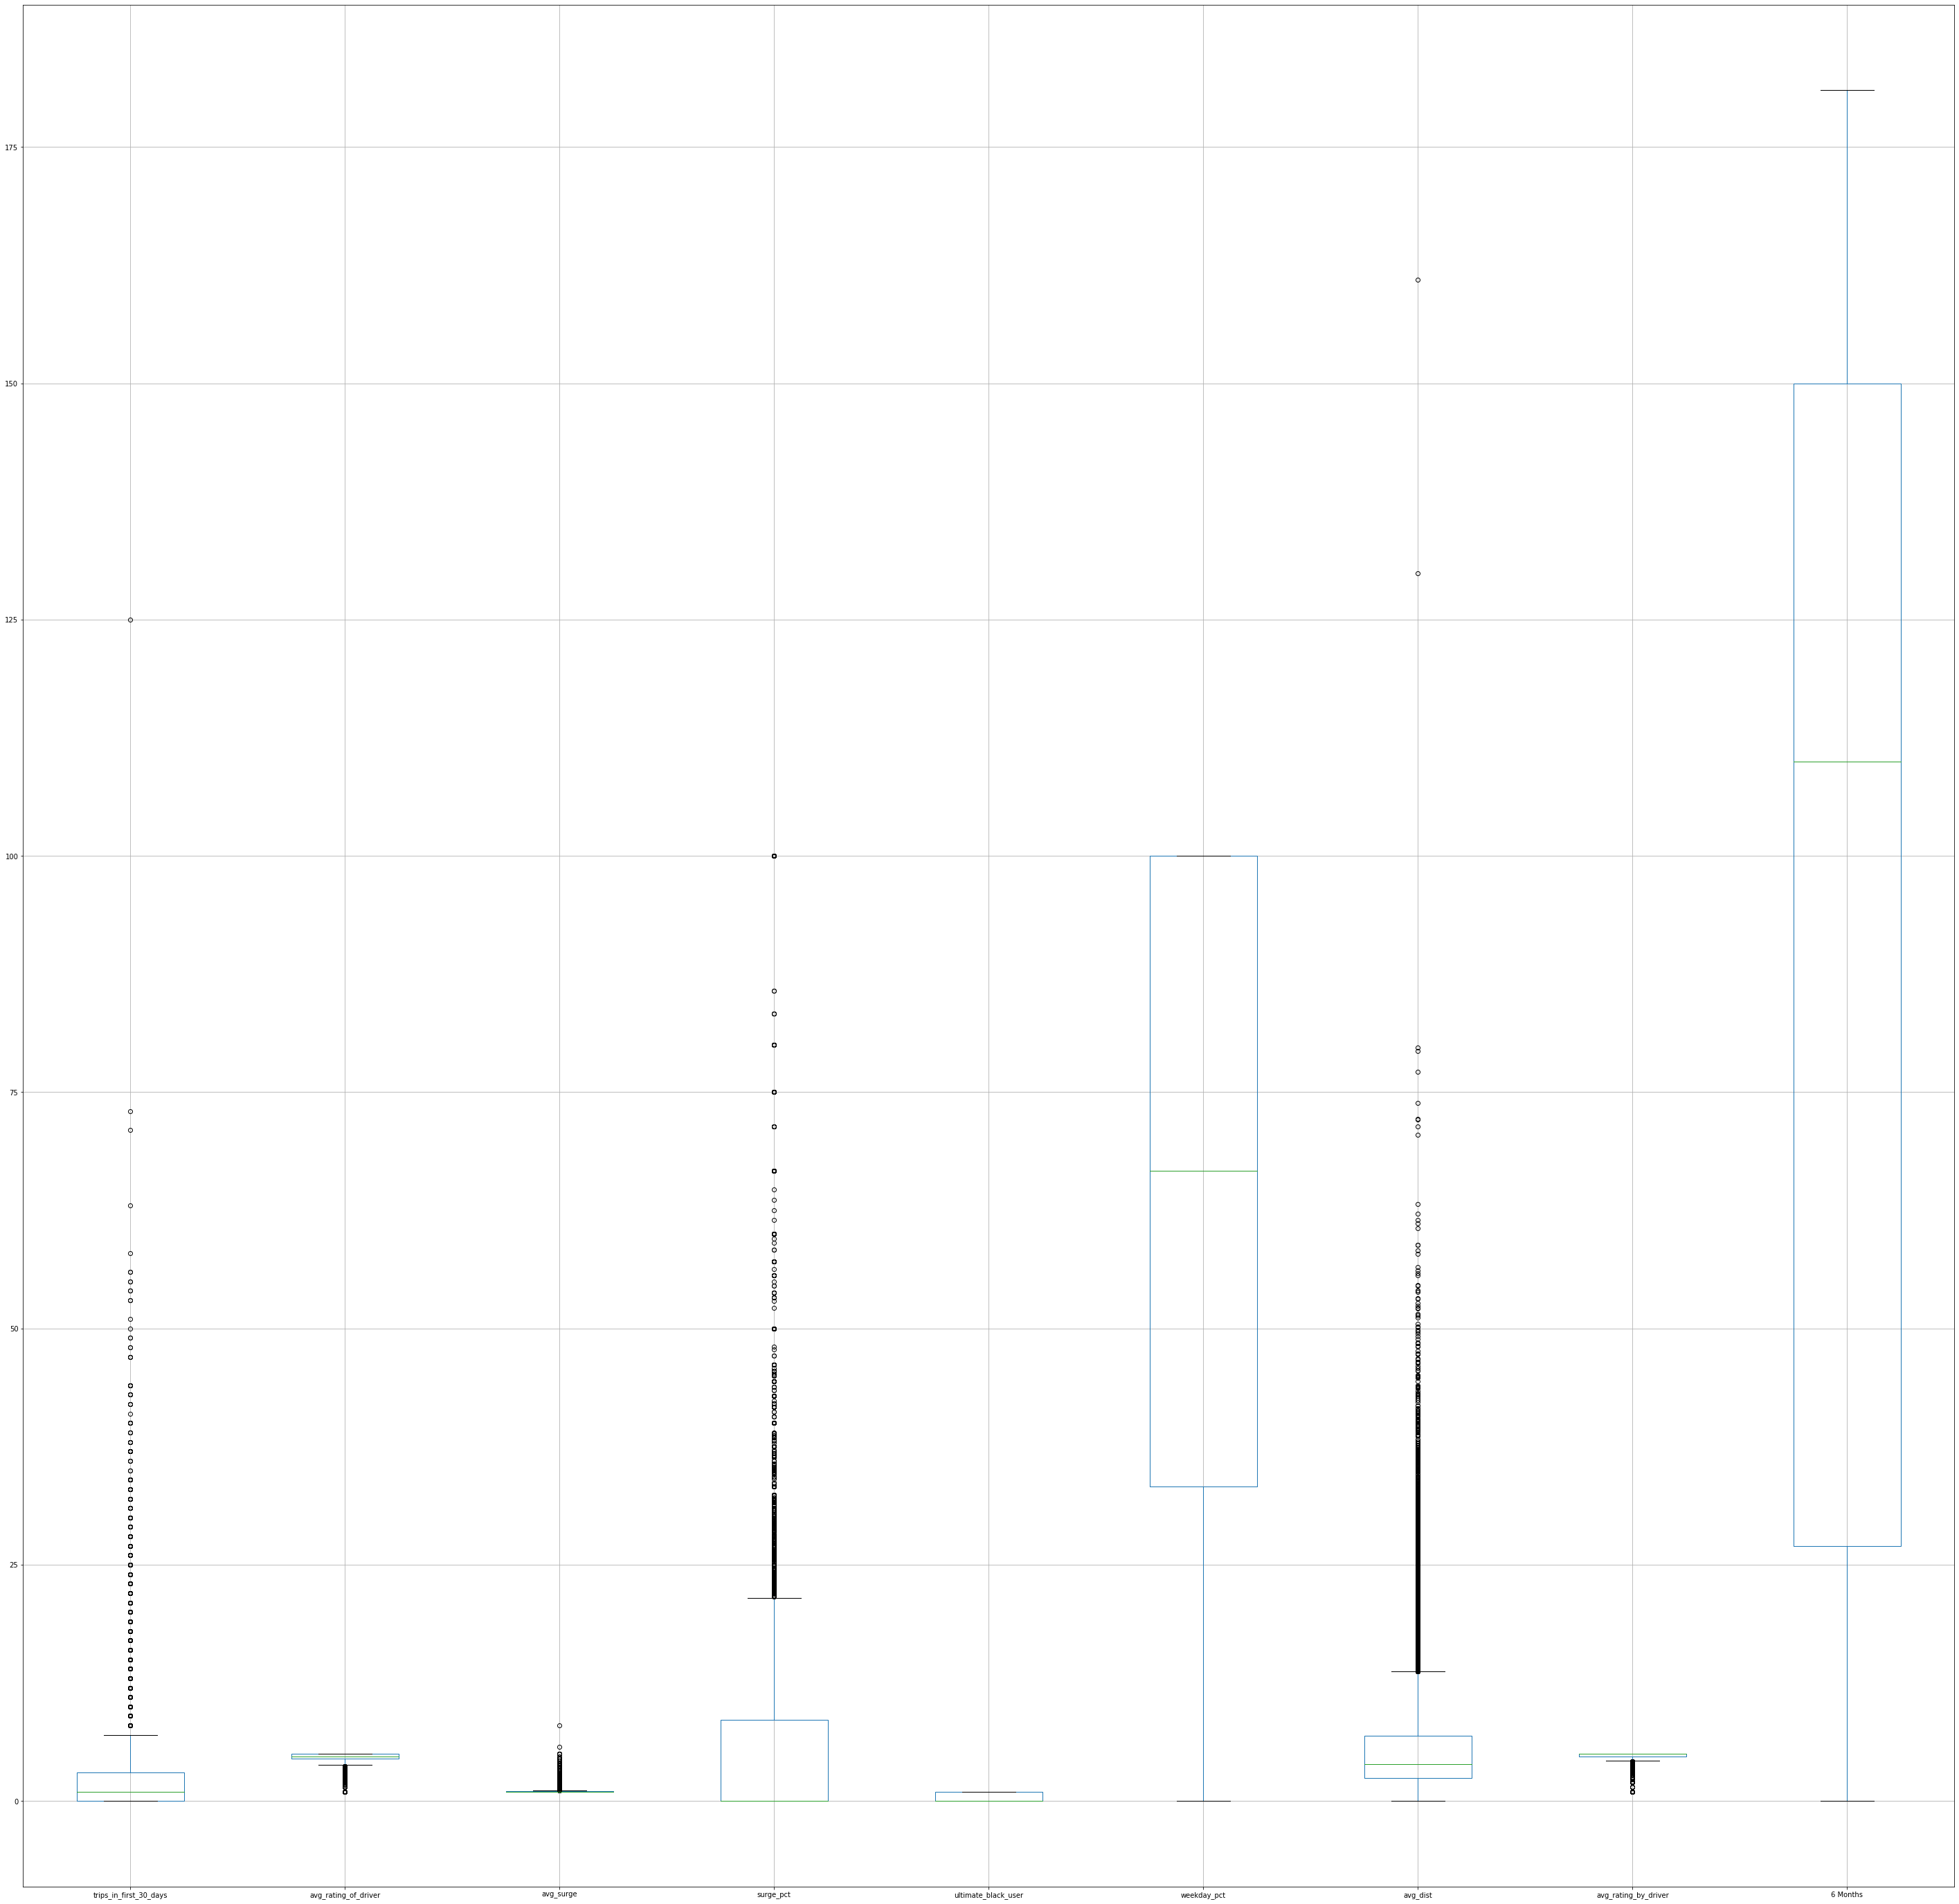

In [52]:
plt.figure(figsize = (50,50))
df.boxplot(column=['trips_in_first_30_days','avg_rating_of_driver',
       'avg_surge', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', '6 Months'])

In [53]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

trips_in_first_30_days      3.00
avg_rating_of_driver        0.50
avg_surge                   0.05
surge_pct                   8.60
ultimate_black_user         1.00
weekday_pct                66.70
avg_dist                    4.52
avg_rating_by_driver        0.30
6 Months                  123.00
retained6Monts              0.00
dtype: float64


In [54]:
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(29273, 14)

In [55]:
df2 = df1[df1['trips_in_first_30_days']>0] 

In [56]:
df2.shape

(19747, 14)

It has been established the dataset contains outliers. However, the dataset was pulled from its original source which shows that the outliers were not caused through data entry issues. Also, the removing this outliers will further increase the signifcance of the study while reducing the natural variability that exist in the dataset. Another issue to its removal is that 42% of the dataset will be removed and as such, important information that can affect the performance of the models.

In [57]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,6 Months,retained6Monts,WeekdaySignUp,WeekdayLastTrip
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,143,0,Saturday,Tuesday
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,96,0,Wednesday,Monday
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,1,0,Monday,Tuesday
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,170,0,Friday,Sunday
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,47,0,Monday,Saturday


In [58]:
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)
df = pd.concat([df,pd.get_dummies(df['city'], prefix='city')],axis=1)
df = pd.concat([df,pd.get_dummies(df['phone'], prefix='phone')],axis=1)
df = pd.concat([df,pd.get_dummies(df['WeekdaySignUp'], prefix='SignUp')],axis=1)
df = pd.concat([df,pd.get_dummies(df['WeekdayLastTrip'], prefix='LastTrip')],axis=1)
df = df.drop(['city', 'phone', 'WeekdaySignUp', 'WeekdayLastTrip'], axis = 1)

In [59]:
df.shape

(50000, 23)

In [60]:
df.dtypes

trips_in_first_30_days      int64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user         int64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
6 Months                    int64
retained6Monts              int64
city_Astapor                uint8
city_King's Landing         uint8
city_Winterfell             uint8
phone_Android               uint8
phone_iPhone                uint8
SignUp_Friday               uint8
SignUp_Monday               uint8
SignUp_Saturday             uint8
SignUp_Wednesday            uint8
LastTrip_Monday             uint8
LastTrip_Saturday           uint8
LastTrip_Sunday             uint8
LastTrip_Tuesday            uint8
dtype: object

In [61]:
df.to_csv(r'/Users/oluwafemibabatunde/Desktop/Springboard/ultimate_challenge/processedDf')

In [62]:
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', '6 Months', 'retained6Monts', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone', 'SignUp_Friday', 'SignUp_Monday', 'SignUp_Saturday',
       'SignUp_Wednesday', 'LastTrip_Monday', 'LastTrip_Saturday',
       'LastTrip_Sunday', 'LastTrip_Tuesday'],
      dtype='object')

In [63]:
col_names = ['trips_in_first_30_days','avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', '6 Months']
dflog = np.log(df[col_names]+1)
dflog.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,6 Months
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.846571,1.716402,0.725685,0.939553,3.467031,1.685322,1.750001,3.858818
std,0.756178,0.124509,0.084849,1.477707,1.691739,0.643621,0.098937,1.640959
min,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000
25%,0.000000,1.704748,0.693147,0.000000,3.535145,1.229641,1.740466,3.332205
50%,0.693147,1.740466,0.693147,0.000000,4.215086,1.585145,1.791759,4.709530
75%,1.386294,1.791759,0.717840,2.261763,4.615121,2.071913,1.791759,5.017280
max,4.836282,1.791759,2.197225,4.615121,4.615121,5.087349,1.791759,5.204007


In [64]:
from sklearn.preprocessing import StandardScaler

SS_scaler = StandardScaler()

col_names = ['trips_in_first_30_days','avg_rating_of_driver',
       'avg_surge', 'surge_pct',
       'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', '6 Months']

scaledCols = ['Sctrips_in_first_30_days','Scavg_rating_of_driver',
       'Scavg_surge', 'Scsurge_pct', 'Scweekday_pct', 'Scavg_dist',
       'Scavg_rating_by_driver', 'Sc6 Months'] 

dfScale = SS_scaler.fit_transform(dflog[col_names])

dfScale = pd.DataFrame(dfScale , columns=scaledCols)



dfScale.head()

,Sctrips_in_first_30_days,Scavg_rating_of_driver,Scavg_surge,Scsurge_pct,Scweekday_pct,Scavg_dist,Scavg_rating_by_driver,Sc6 Months
0,1.008857,0.193274,0.191545,1.257183,0.228976,-0.223990,0.422074,0.677047
1,-1.119550,0.605245,-0.383486,-0.635825,0.274747,0.839605,0.422074,0.436269
2,0.713760,-0.391104,-0.383486,-0.635825,0.678652,-1.731383,0.422074,-1.929179
3,1.925512,0.051117,0.413926,1.424498,0.548210,-0.735505,0.252196,0.781773
4,2.461721,-0.240975,0.686127,1.089464,0.565470,-0.414914,0.252196,0.007546


In [65]:
dfScale.reset_index(drop = True, inplace =True)

In [66]:
dfScaled = pd.concat([df,pd.DataFrame(dfScale , columns=scaledCols)],axis=1)
dfScaled.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,6 Months,retained6Monts,...,LastTrip_Sunday,LastTrip_Tuesday,Sctrips_in_first_30_days,Scavg_rating_of_driver,Scavg_surge,Scsurge_pct,Scweekday_pct,Scavg_dist,Scavg_rating_by_driver,Sc6 Months
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,143,0,...,0,1,1.008857,0.193274,0.191545,1.257183,0.228976,-0.223990,0.422074,0.677047
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,96,0,...,0,0,-1.119550,0.605245,-0.383486,-0.635825,0.274747,0.839605,0.422074,0.436269
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1,0,...,0,1,0.713760,-0.391104,-0.383486,-0.635825,0.678652,-1.731383,0.422074,-1.929179
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,170,0,...,1,0,1.925512,0.051117,0.413926,1.424498,0.548210,-0.735505,0.252196,0.781773
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,47,0,...,0,0,2.461721,-0.240975,0.686127,1.089464,0.565470,-0.414914,0.252196,0.007546


In [67]:
dfScaled = dfScaled.drop(['trips_in_first_30_days','avg_rating_of_driver',
       'avg_surge', 'surge_pct',
       'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', '6 Months'], axis=1)
dfScaled.head()

,ultimate_black_user,retained6Monts,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,SignUp_Friday,SignUp_Monday,SignUp_Saturday,...,LastTrip_Sunday,LastTrip_Tuesday,Sctrips_in_first_30_days,Scavg_rating_of_driver,Scavg_surge,Scsurge_pct,Scweekday_pct,Scavg_dist,Scavg_rating_by_driver,Sc6 Months
0,1,0,0,1,0,0,1,0,0,1,...,0,1,1.008857,0.193274,0.191545,1.257183,0.228976,-0.223990,0.422074,0.677047
1,0,0,1,0,0,1,0,0,0,0,...,0,0,-1.119550,0.605245,-0.383486,-0.635825,0.274747,0.839605,0.422074,0.436269
2,0,0,1,0,0,0,1,0,1,0,...,0,1,0.713760,-0.391104,-0.383486,-0.635825,0.678652,-1.731383,0.422074,-1.929179
3,1,0,0,1,0,0,1,1,0,0,...,1,0,1.925512,0.051117,0.413926,1.424498,0.548210,-0.735505,0.252196,0.781773
4,0,0,0,0,1,1,0,0,1,0,...,0,0,2.461721,-0.240975,0.686127,1.089464,0.565470,-0.414914,0.252196,0.007546


In [68]:
dfScaled.describe()

,ultimate_black_user,retained6Monts,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,SignUp_Friday,SignUp_Monday,SignUp_Saturday,...,LastTrip_Sunday,LastTrip_Tuesday,Sctrips_in_first_30_days,Scavg_rating_of_driver,Scavg_surge,Scsurge_pct,Scweekday_pct,Scavg_dist,Scavg_rating_by_driver,Sc6 Months
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,0.37708,0.001700,0.330680,0.202600,0.466720,0.303020,0.696980,0.000020,0.000040,0.000020,...,0.000020,0.000040,7.222667e-17,1.547582e-16,-1.823979e-15,1.810507e-16,-1.259250e-15,4.772005e-16,6.364986e-16,7.932544e-17
std,0.48466,0.041196,0.470463,0.401941,0.498896,0.459568,0.459568,0.004472,0.006324,0.004472,...,0.004472,0.006324,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.119550e+00,-8.218436e+00,-3.834856e-01,-6.358247e-01,-2.049409e+00,-2.618528e+00,-1.068218e+01,-2.351587e+00
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.119550e+00,-9.360122e-02,-3.834856e-01,-6.358247e-01,4.026361e-02,-7.080042e-01,-9.637421e-02,-3.209216e-01
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.028952e-01,1.932743e-01,-3.834856e-01,-6.358247e-01,4.421858e-01,-1.556476e-01,4.220742e-01,5.184288e-01
75%,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.137598e-01,6.052446e-01,-9.246343e-02,8.947807e-01,6.786515e-01,6.006564e-01,4.220742e-01,7.059732e-01
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.276208e+00,6.052446e-01,1.734327e+01,2.487371e+00,6.786515e-01,5.285816e+00,4.220742e-01,8.197656e-01


In [69]:
dfScaled.to_csv(r'/Users/oluwafemibabatunde/Desktop/Springboard/ultimate_challenge/scaledDf')

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = dfScaled.drop(['retained6Monts'], axis =1)

y = dfScaled['retained6Monts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

This is a classification problem, in supervised learning. Here we have used the following classification models:

* Logistic Regression
* K-Nearest Neighbor (KNN)
* Support vector machine (SVM)
* Random Forest
* Naive Bayes
* Gradient Boost

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set as done above. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

Classification/ Confusion Matrix:
This matrix summarizes the correct and incorrect classifications that a classifier produced for a certain dataset. Rows and columns of the classification matrix correspond to the true and predicted classes respectively. The two diagonal cells (upper left & lower right (TP & TN respectively)) give the number of correct classifications, where the predicted class coincides with the actual class of the observation. The off diagonal cells gives the count of the misclassification (upper right & lower left (FP & FN respectively)). The classification matrix gives estimates of the true classification and misclassification rates.

In [72]:
'''from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	np.seterr(divide='ignore', invalid='ignore')
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train = fs.transform(X_train)
	# transform test input data
	X_test = fs.transform(X_test)
	return X_train, X_test, fs

# feature selection
X_train, X_test, fs = select_features(X_train, y_train, X_test)'''

"from sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_regression\n# feature selection\ndef select_features(X_train, y_train, X_test):\n\t# configure to select a subset of features\n\tnp.seterr(divide='ignore', invalid='ignore')\n\tfs = SelectKBest(score_func=f_regression, k=10)\n\t# learn relationship from training data\n\tfs.fit(X_train, y_train)\n\t# transform train input data\n\tX_train = fs.transform(X_train)\n\t# transform test input data\n\tX_test = fs.transform(X_test)\n\treturn X_train, X_test, fs\n\n# feature selection\nX_train, X_test, fs = select_features(X_train, y_train, X_test)"

## Logistic Regression

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings('ignore')

In [74]:
from sklearn.model_selection import GridSearchCV
clfl2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 {'C': 0.0001},
 0.99816,
 {'mean_fit_time': array([0.05816259, 0.0653451 , 0.09718347, 0.12594109, 0.19287505,
         0.29640107]),
  'std_fit_time': array([0.00623019, 0.0015543 , 0.0028088 , 0.00761679, 0.00937302,
         0.01374943]),
  'mean_score_time': array([0.00336399, 0.0030025 , 0.00295691, 0.0029119 , 0.00321355,
         0.00296187]),
  'std_score_time': array([9.43000337e-04, 9.45987238e-05, 7.70097768e-05, 9.19789832e-05,
         1.92753575e-04, 8.64695246e-05]),
  'param_C': masked_array(data=[0.0001, 0.001, 0.1, 1, 10, 100],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=obje

In [75]:
clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(X_train, y_train)
ypred=clfl2.predict(X_test)
accuracy_score(ypred, y_test)

0.99872

In [76]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,ypred)
print(cnf_matrix)
Accuracy_lr=clfl2.score(X_test,y_test)

print(Accuracy_lr)

[[12484     0]
 [   16     0]]
0.99872


In [77]:
Accuracy_lr=clfl2.score(X_train,y_train)
Accuracy_lr

0.99816

The confusion matrix shows that logistic regression model performed very well on the dataset and the accuracy score is very high.

In [78]:
from sklearn.model_selection import cross_val_score

clfl = LogisticRegression()

cv_scores_test= cross_val_score(clfl,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(clfl,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.7350821  0.7339474  0.74302496 0.84594847 0.79086538]
Mean cross validation test score: 0.7697736642945894
Mean cross validation train score: 0.8964835636843
Standard deviation in cv test scores: 0.04347408565824057


With the cross validation scores above, it is same to say that the model was too optimistic and overfit the dataset. Other models will be considered.

## K-Nearest Neighbor (KNN):

In [79]:
from sklearn.neighbors import KNeighborsClassifier


# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)

[[12484     0]
 [   16     0]]
0.99872


In [80]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.70965158 0.63209184 0.63582966 0.62394874 0.46694712]
Mean cross validation test score: 0.6136937883152089
Mean cross validation train score: 0.6501957498977742
Standard deviation in cv scores: 0.07959413737224559


## Support Vector Machine

In [81]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[12484     0]
 [   16     0]]
0.99872


In [82]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.99379255 0.99906555 0.99532773 1.         1.        ]
Mean cross validation test score: 0.9976371645975171
Mean cross validation train score: 0.9996249516205203
Standard deviation in cv scores: 0.002581503858334054


## Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[12484     0]
 [    0    16]]
1.0


In [84]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[1. 1. 1. 1. 1.]
Mean cross validation test score: 1.0
Mean cross validation train score: 1.0
Standard deviation in cv scores: 0.0


## Naive Baise

In [85]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[12410    74]
 [    0    16]]
0.99408


In [86]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.9984982  0.99893205 0.99853157 0.99959952 0.99919872]
Mean cross validation test score: 0.9989520116447428
Mean cross validation train score: 0.9994767101622939
Standard deviation in cv scores: 0.00041551073218550326


## Gradient Boosting

In [87]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[12484     0]
 [    0    16]]
1.0


In [88]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[1. 1. 1. 1. 1.]
Mean cross validation test score: 1.0
Mean cross validation train score: 1.0
Standard deviation in cv scores: 0.0


## MODEL COMPARISON

We applied different ML models above and evaluated their performances in terms of ROC-AUC score for both the training and test data. Here we have tabulated the scores and plotted them.

Clearly, the Gradient Boost, and the Random Forest are the two best performing models. Both of the models are ensembled, based on decision trees.
So, we will perform a grid search/ hyperparameter tuning for those two ML models.

In [89]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression               0.99816
1                  KNN               0.99872
2                  SVM               0.99872
3        Random Forest               1.00000
4       Gradient Boost               1.00000
5          Naive Bayes               0.99408


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.896484,0.769774
1,KNN,0.650196,0.613694
2,SVM,0.999625,0.997637
3,Random Forest,1.000000,1.000000
4,Gradient Boost,1.000000,1.000000
5,Naive Bayes,0.999477,0.998952


Going by the table above, the 6 models performed well but the best performing models are Random Forest and Gradient Boost. It should be noted that the cross validation of these two models gave a accuracy scores of 1. The ROC-AUC scores for both train and test datasets got score 1 too. As a result, RF and GB will be used to generate the most important features needed to predict the tendency of a user being on the platform for 6 months.

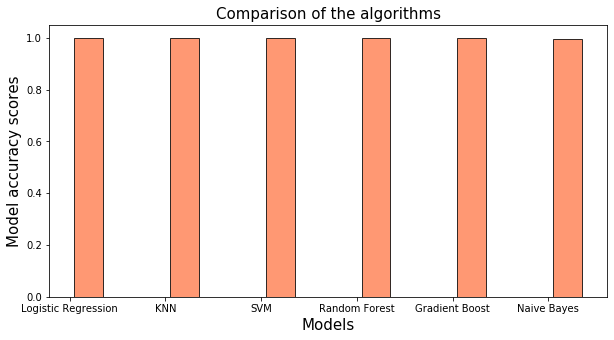

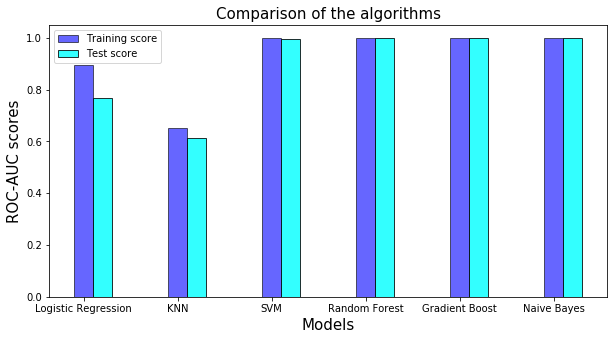

In [90]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

### Random Forest best feature selection

In [ ]:
Considering 

In [98]:
features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
tab



,Features,Importance scores
0,ultimate_black_user,0.000000e+00
1,city_Astapor,0.000000e+00
2,city_King's Landing,0.000000e+00
3,city_Winterfell,1.000135e-08
4,phone_Android,1.127192e-07
5,phone_iPhone,2.153505e-07
6,SignUp_Friday,3.197464e-07
7,SignUp_Monday,7.017139e-07
8,SignUp_Saturday,2.478945e-03
9,SignUp_Wednesday,2.651748e-03


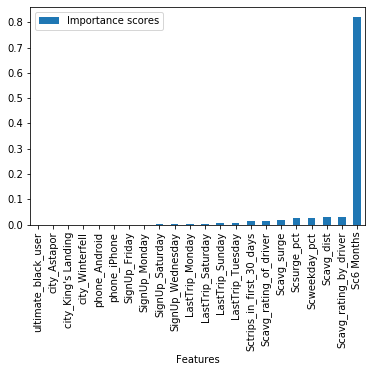

In [92]:
tab.plot(kind='bar', x = 'Features', y ='Importance scores')

Sc6 Months is the number of days the user has used on the platform (using the last trip date as the baseline). Since the dependent variable was engineered from this feature, it can be assumed that it will be highly important to its prediction. Other features of importance are average rating by driver, average distance covered by user, the percentage of users' trips on weekday, trip surges and the number of trips taken in the first 30 days. Other features of less improtance are the days of the week when last trips were taken on the platform.

## Gradient Boost important features.

In [93]:
features = X
importances = list(gbc.feature_importances_)
imp=np.sort(importances)
tab1=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
tab1

,Features,Importance scores
0,ultimate_black_user,0.0
1,city_Astapor,0.0
2,city_King's Landing,0.0
3,city_Winterfell,0.0
4,phone_Android,0.0
5,phone_iPhone,0.0
6,SignUp_Friday,0.0
7,SignUp_Monday,0.0
8,SignUp_Saturday,0.0
9,SignUp_Wednesday,0.0


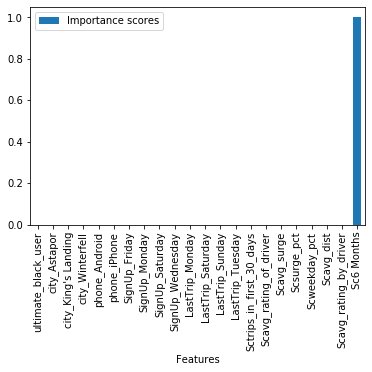

In [94]:
tab1.plot(kind='bar', x = 'Features', y ='Importance scores')

The gradient boost also showed that the best performing feature in the model is Sc6 Months (number of days spent on the platform). The same argument of strong relationship with dependent variable (through feature engineering) can be experienced here. Other feature's magnitude of importance were in the range of 0.0. Hence, it can be concluded that the Random Forest will be chosen as the best performing model. 

 The approach taken to engineer the dependent variable was to find the difference between the signup date and the last trip date. The result was divided by 180 (number of days in 6 months). Binary value was attached as 1 if user's last trip day from sign up date was greater than or equal to 1. 0 was attached if the dividion resulted in value less than 1. 
 
The dataset was cleaned and outliers were seen in the dataset. The processed original dataset with outliers was used for prediction. The reason for this was that when the dataset with removed outliers were used, error was gotten as the only value present in the dependent variable was 0. For a classification problem, for models to work, the dependent variable should have atleast 2 values. As a result, the removed outlier caused the observations with values of 1 for the dependent varaible to be dropped. This apparently will affect the model. Hence, the original processed and standardized dataset was used.

Cosidering the output of the best performing features from Random Forest, Ultimate needs to ensure that irrespective of the distance to be covered by drivers, the trips must be completed. Also, as the ratings given by drivers to riders play role in retaining users on the platform, Ultimate can remove the otion to give ratings by drivers entirely or redesign it in such a way that it is only used for back end decision making and not seen by users. Drivers also need to be trained and constantly reminded of the need to be professional and courteous with riders. Also, drivers must drive in ways that laws are obeyed and lives of riders are not put in danger.

Also, Ultimate need to ensure that drivers are available when there are increased demand as users' surge ranked  high on the important feature list. Drivers' availability is very important during the weekday. 

In conclusion, incentives targeted at riders can be given for the first month of signing up on the platform to encourage retainage and activeness.
